In [1]:
pip install pandas numpy matplotlib seaborn


Dataset Dimensions (Rows, Columns): (27891, 14)

Dataset Summary:
                                          Id                 START  \
count                                  27891                 27891   
unique                                 27891                 27541   
top     32c84703-2481-49cd-d571-3899d5820253  2016-12-08T10:00:40Z   
freq                                       1                     3   
mean                                     NaN                   NaN   
std                                      NaN                   NaN   
min                                      NaN                   NaN   
25%                                      NaN                   NaN   
50%                                      NaN                   NaN   
75%                                      NaN                   NaN   
max                                      NaN                   NaN   

                        STOP                               PATIENT  \
count                  

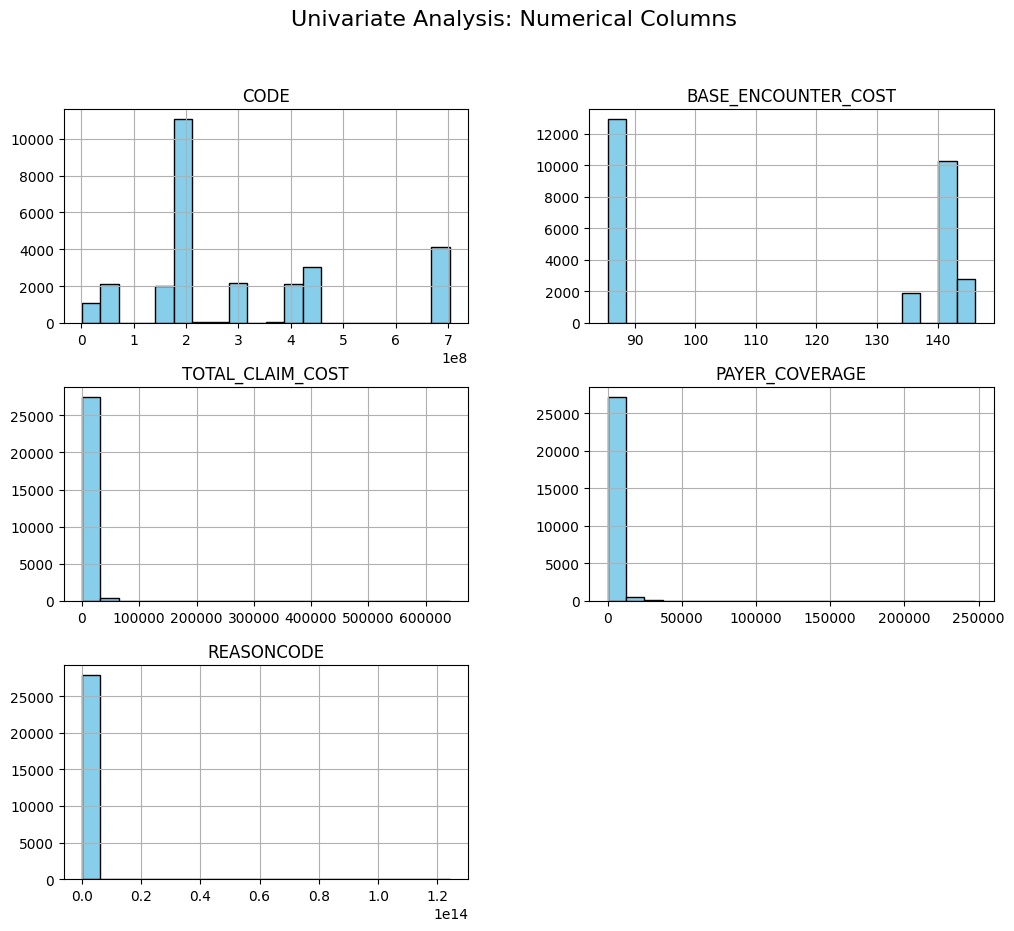

<ipython-input-3-e016b5a26d88>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


KeyboardInterrupt: 

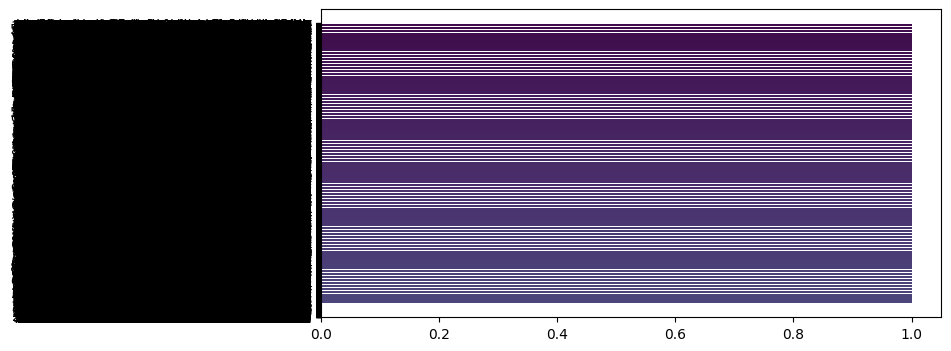

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path to your dataset
file_path = "/content/Hospital_Patient_Records_encounters.csv"

# Load the dataset
data = pd.read_csv(file_path)

# 1. Dimension
print("Dataset Dimensions (Rows, Columns):", data.shape)

# 2. Summary
print("\nDataset Summary:")
print(data.describe(include="all"))

# 3. Data Handling
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Check data types
print("\nData Types:\n", data.dtypes)

# Check unique values for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

# 4. Data Cleaning
# Handle missing numerical values (e.g., replace with the mean)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Handle missing categorical values (e.g., replace with 'Unknown')
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify data after cleaning
print("\nData after cleaning:")
print(data.isnull().sum())

# 5. Univariate Analysis
# Plot histograms for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis: Numerical Columns', fontsize=16)
plt.show()

# Plot countplots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Univariate Analysis: {col}')
    plt.show()

# 6. Bivariate Analysis
# Scatter plot between 'BASE_ENCOUNTER_COST' and 'TOTAL_CLAIM_COST'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BASE_ENCOUNTER_COST', y='TOTAL_CLAIM_COST', data=data, alpha=0.7)
plt.title('Bivariate Analysis: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST')
plt.show()

# Boxplot for BASE_ENCOUNTER_COST by ENCOUNTERCLASS
plt.figure(figsize=(12, 6))
sns.boxplot(x='ENCOUNTERCLASS', y='BASE_ENCOUNTER_COST', data=data)
plt.title('Bivariate Analysis: ENCOUNTERCLASS vs BASE_ENCOUNTER_COST')
plt.xticks(rotation=45)
plt.show()

# 7. Multivariate Analysis
# Pairplot for selected numerical columns
selected_cols = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']
sns.pairplot(data[selected_cols], diag_kind='kde')
plt.suptitle('Multivariate Analysis: Pairplot', y=1.02)
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Heatmap')
plt.show()

# Save cleaned dataset
cleaned_file_path = "/content/Cleaned_Hospital_Patient_Records.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")


Dataset Dimensions (Rows, Columns): (10000, 14)

Dataset Summary:
                                          Id                 START  \
count                                  10000                 10000   
unique                                 10000                  9943   
top     45e12044-bee7-0cf6-1fa4-22cf463aa876  2012-07-23T17:55:09Z   
freq                                       1                     2   
mean                                     NaN                   NaN   
std                                      NaN                   NaN   
min                                      NaN                   NaN   
25%                                      NaN                   NaN   
50%                                      NaN                   NaN   
75%                                      NaN                   NaN   
max                                      NaN                   NaN   

                        STOP                               PATIENT  \
count                  

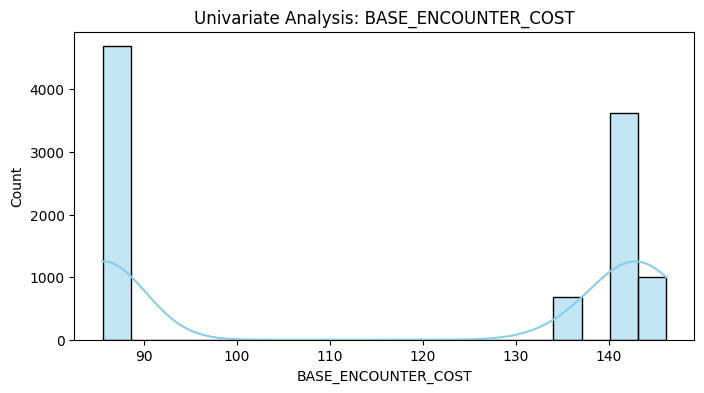

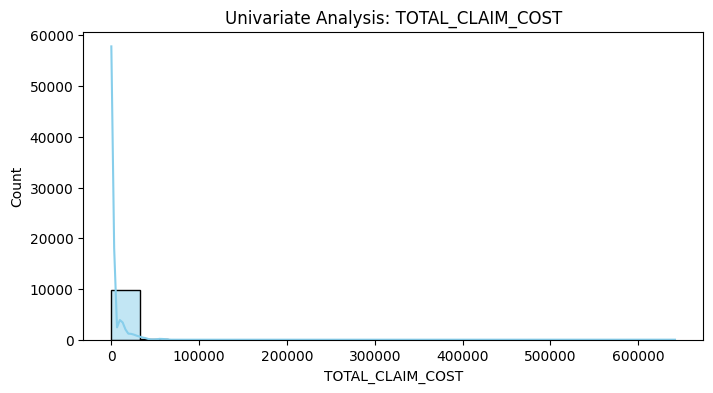

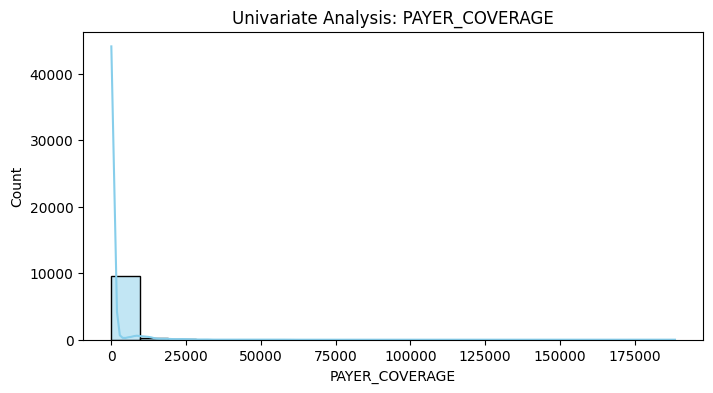

<ipython-input-4-2f372859546f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis')


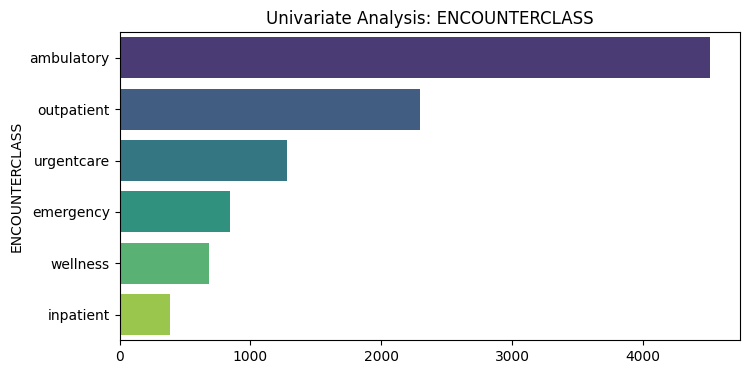

<ipython-input-4-2f372859546f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis')


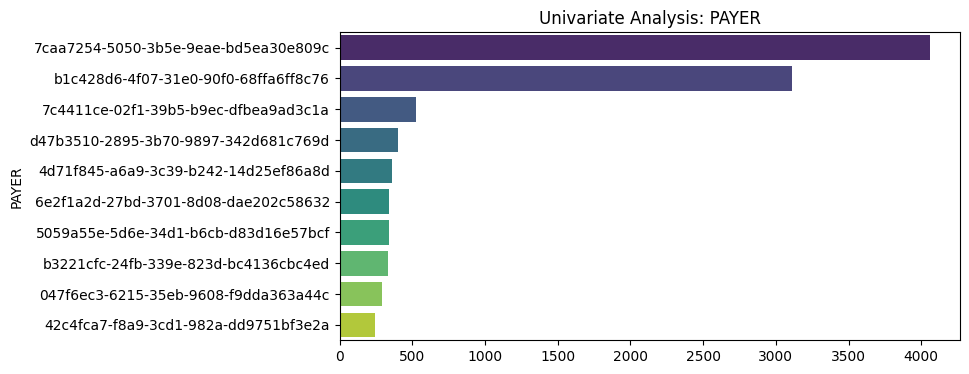

<ipython-input-4-2f372859546f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis')


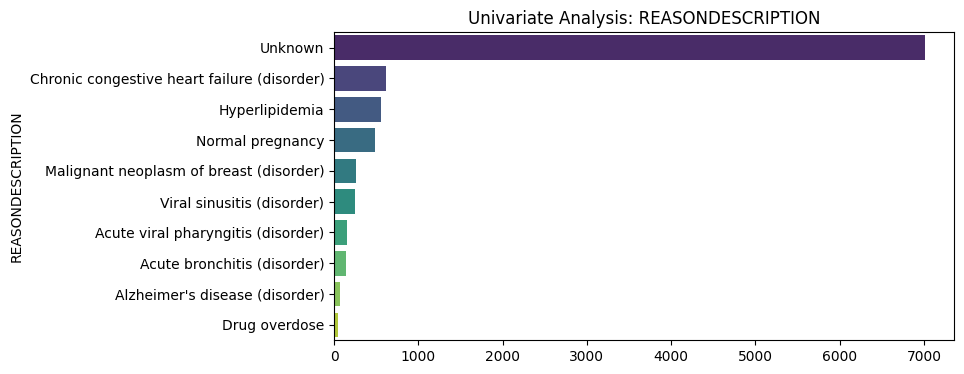

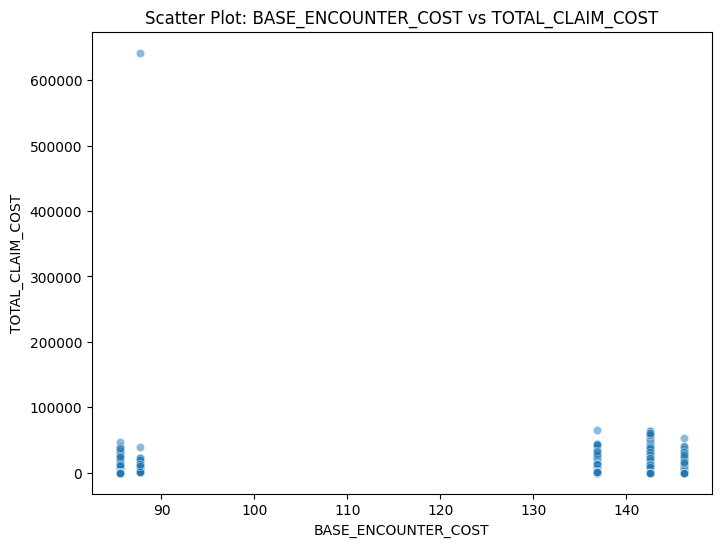

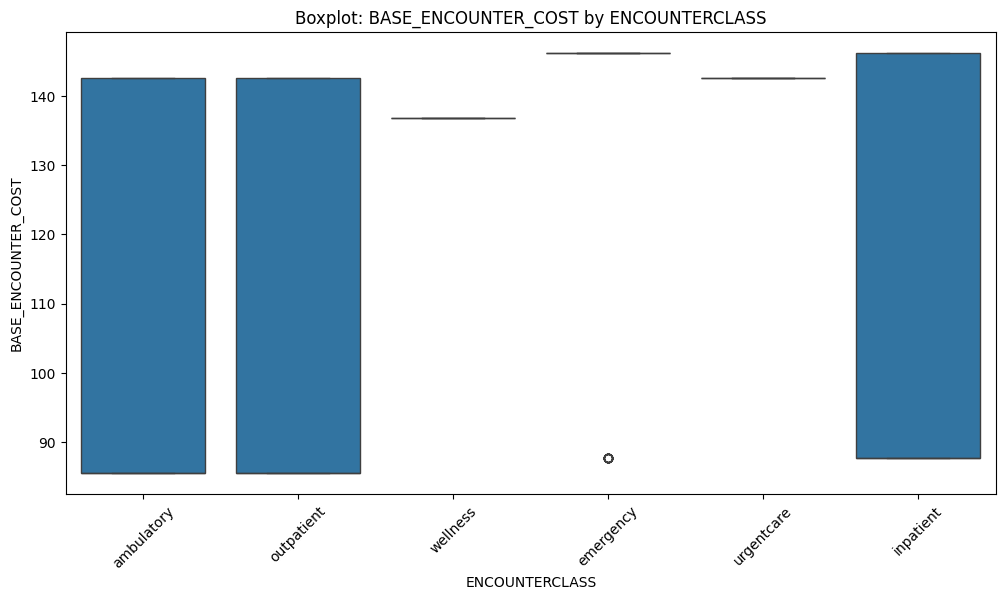

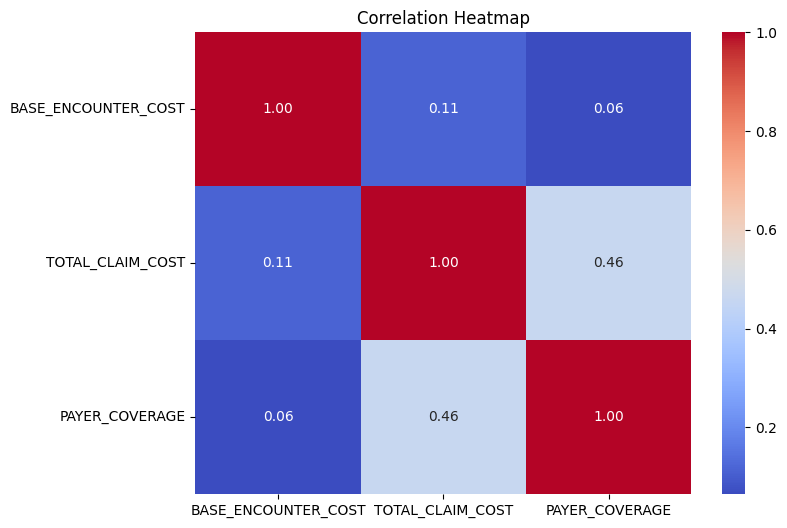

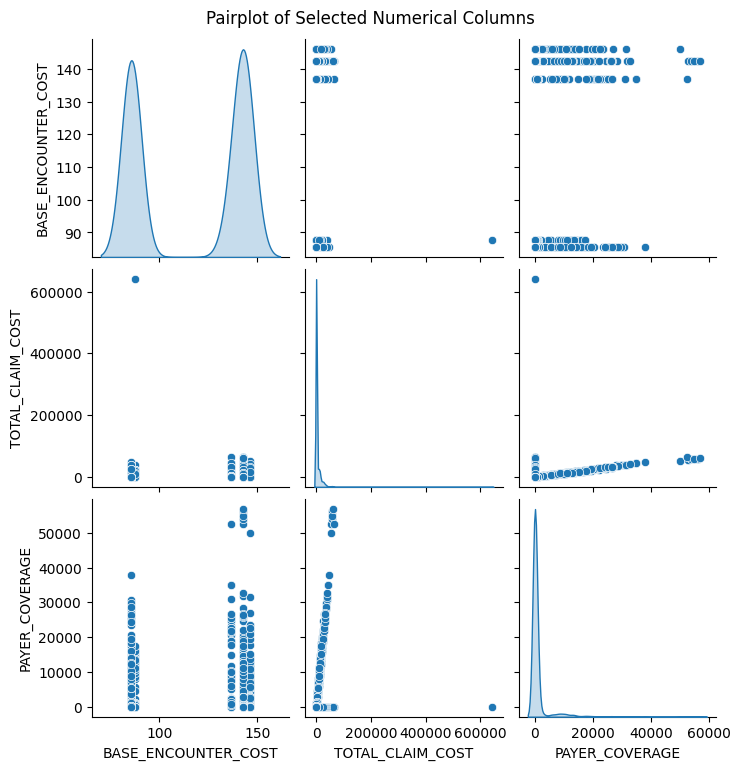

Cleaned data saved to /content/Cleaned_Hospital_Patient_Records.csv


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Hospital_Patient_Records_encounters.csv"
data = pd.read_csv(file_path)

# Limit data size for faster processing (optional)
data = data.sample(n=10000, random_state=42)  # Use a sample of 10,000 rows

# 1. Dimension and Summary
print("Dataset Dimensions (Rows, Columns):", data.shape)
print("\nDataset Summary:")
print(data.describe(include="all"))

# 2. Data Handling
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# 3. Univariate Analysis
def plot_univariate(data, column, top_n=None):
    """Plots univariate analysis for a column."""
    plt.figure(figsize=(8, 4))
    if data[column].dtype == 'object':
        if top_n:
            value_counts = data[column].value_counts().head(top_n)
            sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis')
        else:
            sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette='viridis')
        plt.title(f"Univariate Analysis: {column}")
    else:
        sns.histplot(data[column], kde=True, bins=20, color='skyblue')
        plt.title(f"Univariate Analysis: {column}")
    plt.show()

# Plot numerical and top categorical variables
for col in ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']:
    plot_univariate(data, col)

for col in ['ENCOUNTERCLASS', 'PAYER', 'REASONDESCRIPTION']:
    plot_univariate(data, col, top_n=10)  # Limit to top 10 categories

# 4. Bivariate Analysis
# Scatter plot: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST (sampled for efficiency)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BASE_ENCOUNTER_COST', y='TOTAL_CLAIM_COST', data=data.sample(n=5000, random_state=42), alpha=0.5)
plt.title("Scatter Plot: BASE_ENCOUNTER_COST vs TOTAL_CLAIM_COST")
plt.show()

# Boxplot: BASE_ENCOUNTER_COST by ENCOUNTERCLASS (filter top 10 classes)
top_classes = data['ENCOUNTERCLASS'].value_counts().index[:10]
filtered_data = data[data['ENCOUNTERCLASS'].isin(top_classes)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='ENCOUNTERCLASS', y='BASE_ENCOUNTER_COST', data=filtered_data)
plt.title("Boxplot: BASE_ENCOUNTER_COST by ENCOUNTERCLASS")
plt.xticks(rotation=45)
plt.show()

# 5. Multivariate Analysis
# Correlation heatmap (numerical columns only)
numerical_cols = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']
corr = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected numerical columns (sampled for efficiency)
sns.pairplot(data.sample(n=5000, random_state=42)[numerical_cols], diag_kind='kde')
plt.suptitle("Pairplot of Selected Numerical Columns", y=1.02)
plt.show()

# Save cleaned data
data.to_csv('/content/Cleaned_Hospital_Patient_Records.csv', index=False)
print("Cleaned data saved to /content/Cleaned_Hospital_Patient_Records.csv")


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset (use the provided file path)
df = pd.read_csv('/content/Hospital_Patient_Records_encounters.csv')

# Module 1: Introduction to Exploratory Data Analysis

# Display first few rows of the dataset
print(df.head())

# Display random sample of rows
print(df.sample(5))

# Get summary information of the dataset
df.info()

# Check for missing values
print(df.isna().sum())

                                     Id                 START  \
0  32c84703-2481-49cd-d571-3899d5820253  2011-01-02T09:26:36Z   
1  c98059da-320a-c0a6-fced-c8815f3e3f39  2011-01-03T05:44:39Z   
2  4ad28a3a-2479-782b-f29c-d5b3f41a001e  2011-01-03T14:32:11Z   
3  c3f4da61-e4b4-21d5-587a-fbc89943bc19  2011-01-03T16:24:45Z   
4  a9183b4f-2572-72ea-54c2-b3cd038b4be7  2011-01-03T17:36:53Z   

                   STOP                               PATIENT  \
0  2011-01-02T12:58:36Z  3de74169-7f67-9304-91d4-757e0f3a14d2   
1  2011-01-03T06:01:42Z  d9ec2e44-32e9-9148-179a-1653348cc4e2   
2  2011-01-03T14:47:11Z  73babadf-5b2b-fee7-189e-6f41ff213e01   
3  2011-01-03T16:39:45Z  3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b   
4  2011-01-03T17:51:53Z  fa006887-d93c-d302-8b89-f3c25f88c0e1   

                           ORGANIZATION                                 PAYER  \
0  d78e84ec-30aa-3bba-a33a-f29a3a454662  b1c428d6-4f07-31e0-90f0-68ffa6ff8c76   
1  d78e84ec-30aa-3bba-a33a-f29a3a454662  b1c428d6-4f07-3

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset (use the provided file path)
df = pd.read_csv('/content/Hospital_Patient_Records_encounters.csv')

# Module 1: Introduction to Exploratory Data Analysis

# Display first few rows of the dataset
print(df.head())

# Display random sample of rows
print(df.sample(5))

# Get summary information of the dataset
df.info()

# Check for missing values
print(df.isna().sum())

# Module 2: Data Transformation

# Removing duplicates
df = df.drop_duplicates()

# Handling missing values (if necessary, assume '?' or NaN)
# Example: fill missing values for numerical columns with forward fill or mean
# Select only numerical columns before calculating the mean
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(exclude=np.number).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


# Check if any NaN values are left
print(df.isna().sum())

# Create a new categorical feature (example: patient age group or other feature)
# Modify based on the actual features in your dataset
# Example: Assuming there is a column 'age', creating age groups
bins = [0, 18, 40, 60, np.inf]
labels = ['Child', 'Adult', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Check the transformed dataframe
print(df.head())

# ... (rest of the code remains the same)

# Module 3: Correlation Analysis and Time Series Analysis

# Correlation analysis using Pearson correlation coefficient
corr_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis (Example: Average length of stay by encounter date)
# Assuming there's a 'length_of_stay' and 'encounter_date' columns
df['encounter_date'] = pd.to_datetime(df['encounter_date'])
df['year'] = df['encounter_date'].dt.year
avg_stay_by_year = df.groupby('year')['length_of_stay'].mean()

# Plot the average length of stay by year
plt.figure(figsize=(10, 6))
plt.plot(avg_stay_by_year, marker='o')
plt.title('Average Length of Stay by Year')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay')
plt.grid(True)
plt.show()

# Module 4: Data Summarization and Visualization

# Summarize the numerical features
print(df.describe())

# Plot histogram for 'length_of_stay' or any other numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['length_of_stay'], bins=20, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'age' or any other numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for 'gender' (assuming gender column exists)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Scatter plot of 'age' vs 'length_of_stay'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='length_of_stay', data=df)
plt.title('Age vs Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay')
plt.show()

# Module 5: Clustering Algorithms

# Preprocess data: select relevant features (modify based on actual features)
X = df[['age', 'length_of_stay', 'number_of_procedures', 'num_medications']]  # Example columns

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

# 2. Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate the clustering performance using silhouette score
agg_silhouette = silhouette_score(X_scaled, agg_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Module 6: Data Visualization for Clusters

# Add the cluster labels to the dataframe
df['agg_cluster'] = agg_labels
df['gmm_cluster'] = gmm_labels

# Visualizing clusters with pairplot (using agglomerative clusters)
sns.pairplot(df, hue='agg_cluster', palette='coolwarm', vars=['age', 'length_of_stay', 'num_medications'])
plt.suptitle('Agglomerative Clustering', y=1.02)
plt.show()

# Visualizing clusters with pairplot (using GMM clusters)
sns.pairplot(df, hue='gmm_cluster', palette='coolwarm', vars=['age', 'length_of_stay', 'num_medications'])
plt.suptitle('Gaussian Mixture Model', y=1.02)
plt.show()

# Visualizing the mean length of stay by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='agg_cluster', y='length_of_stay', data=df)
plt.title('Length of Stay Distribution by Agglomerative Cluster')
plt.xlabel('Agglomerative Cluster')
plt.ylabel('Length of Stay')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gmm_cluster', y='length_of_stay', data=df)
plt.title('Length of Stay Distribution by GMM Cluster')
plt.xlabel('GMM Cluster')
plt.ylabel('Length of Stay')
plt.show()

# Module 7: Advanced Analysis and Model Evaluation

# Advanced Statistical Analysis
print("Variance of each feature:\n", df.var())
print("\nSkewness of each feature:\n", df.skew())

# Boxplot for 'age' distribution by 'age_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='age', data=df)
plt.title('Age Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.show()

# Stripplot to see distribution of 'length_of_stay' by 'gender'
plt.figure(figsize=(10, 6))
sns.stripplot(x='gender', y='length_of_stay', data=df, jitter=True)
plt.title('Length of Stay Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.show()

# Evaluating clustering using silhouette score
agg_silhouette = silhouette_score(X_scaled, agg_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")


                                     Id                 START  \
0  32c84703-2481-49cd-d571-3899d5820253  2011-01-02T09:26:36Z   
1  c98059da-320a-c0a6-fced-c8815f3e3f39  2011-01-03T05:44:39Z   
2  4ad28a3a-2479-782b-f29c-d5b3f41a001e  2011-01-03T14:32:11Z   
3  c3f4da61-e4b4-21d5-587a-fbc89943bc19  2011-01-03T16:24:45Z   
4  a9183b4f-2572-72ea-54c2-b3cd038b4be7  2011-01-03T17:36:53Z   

                   STOP                               PATIENT  \
0  2011-01-02T12:58:36Z  3de74169-7f67-9304-91d4-757e0f3a14d2   
1  2011-01-03T06:01:42Z  d9ec2e44-32e9-9148-179a-1653348cc4e2   
2  2011-01-03T14:47:11Z  73babadf-5b2b-fee7-189e-6f41ff213e01   
3  2011-01-03T16:39:45Z  3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b   
4  2011-01-03T17:51:53Z  fa006887-d93c-d302-8b89-f3c25f88c0e1   

                           ORGANIZATION                                 PAYER  \
0  d78e84ec-30aa-3bba-a33a-f29a3a454662  b1c428d6-4f07-31e0-90f0-68ffa6ff8c76   
1  d78e84ec-30aa-3bba-a33a-f29a3a454662  b1c428d6-4f07-3

KeyError: 'age'